# Groupal analysis notebook for Double T-maze task

### To analyze:

- Plot of example trajectory in Allostatic and Control agents.
- Plot of example occupancy map in Allostatic and Control agents.
- Mean internal state maintained during the entire simulation (and across the 20 experiments) for Allostatic and Control agents. We will show a bar plot with it.
- Need vs Temperature correlation plots. Scatter plot where the Y axis is gradient temperature and the X axis is the agent's internal state. Approach to this: We will make groups based on gradient temperature. We can make 100 groups. We compute the mean internal state of the agent in each gradient temperature level. We plot this in the scatter plot.
- Similarly, we will compute correlations between gradient temperature and game theory measures (Efficiency, Fairness, and Stability).
- Additionally, we are going to show the correlation between security drops and the urgency to solve other internal needs.

## Import libraries

In [49]:
import matplotlib.pyplot as plt
import scipy.stats as sci
import statistics as stt
import pandas as pd
import numpy as np
import statistics
import math
import ast
import csv
import os

In [91]:
allostatic_agent = False

## Import data

In [92]:
allostatic_folder_path = '../data/Allostatic_agent_data/'
control_folder_path = '../data/Control_agent_data/'

In [93]:
allostatic_csv_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
print("CSV files in the allostatic directory:", allostatic_csv_files)
allostatic_n_experiments = len(allostatic_csv_files)
print("Total allostatic experiments =", allostatic_n_experiments)

control_csv_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
print("CSV files in the control directory:", control_csv_files)
control_n_experiments = len(control_csv_files)
print("Total control experiments =", control_n_experiments)

CSV files in the directory: ['5.csv', '10.csv', '1.csv', '16.csv', '7.csv', '2.csv', '14.csv', '8.csv', '3.csv', '11.csv', '12.csv', '18.csv', '13.csv', '17.csv', '4.csv', '6.csv', '15.csv', '9.csv']
Total experiments = 18


In [94]:
csv_order = []
for i in range(n_experiments):
    csv_order.append(int(csv_files[i][:-4]))

In [95]:
sorted_pairs = sorted(zip(csv_order, csv_files))
sorted_list1, sorted_csv_files = zip(*sorted_pairs)

In [96]:
sorted_csv_files

('1.csv',
 '2.csv',
 '3.csv',
 '4.csv',
 '5.csv',
 '6.csv',
 '7.csv',
 '8.csv',
 '9.csv',
 '10.csv',
 '11.csv',
 '12.csv',
 '13.csv',
 '14.csv',
 '15.csv',
 '16.csv',
 '17.csv',
 '18.csv')

In [97]:
data = []
for i in range(n_experiments):
    csv_filename = folder_path + sorted_csv_files[i]
    data.append(pd.read_csv(csv_filename))

In [98]:
for i in range(n_experiments):
    data[i]['Row_index'] = data[i].index
print('Number of columns = ' + str(data[0].shape[1]))
print('Number of rows = ' + str(data[0].shape[0]))
data[1]

Number of columns = 17
Number of rows = 9649


Trial_number  Trial_time  Gradient_T        X        Y          Z  \
0                1     0.03200     0.95701 -0.00244 -0.00132  321.24310   
1                1     0.16000     0.95701  0.00385  0.00222  309.00993   
2                1     0.28800     0.95701  0.00947  0.00830  303.06282   
3                1     0.41600     0.95701  0.01543  0.01773  303.62927   
4                1     0.51200     0.95701  0.02058  0.02507  301.10724   
...            ...         ...         ...      ...      ...        ...   
9977             1  1199.55200     0.93437 -0.52359 -1.34465  357.45658   
9978             1  1199.68005     0.93808 -0.51056 -1.34399  358.71761   
9979             1  1199.74402     0.93808 -0.50396 -1.34387  358.52165   
9980             1  1199.83997     0.93808 -0.49971 -1.34366  358.96643   
9981             1  1199.93604     0.93808 -0.49690 -1.34322    1.53471   

      IS_temperature  IS_hydration  IS_energy  IS_security  IS_mating  \
0             0.9092        0.8996     0.1997      0.00000     0.8998   
1             0.9184        0.8992     0.1994      0.00000     0.8996   
2             0.9276        0.8988     0.1991      0.00000     0.8994   
3             0.9368        0.8984     0.1988      0.00000     0.8992   
4             0.9460        0.8980     0.1985      0.00000     0.8990   
...              ...           ...        ...          ...        ...   
9977          1.0000        0.0000     0.1236      0.05995     0.2058   
9978          1.0000        0.0000     0.1233      0.05995     0.2056   
9979          1.0000        0.0000     0.1230      0.07822     0.2054   
9980          1.0000        0.0000     0.1227      0.07822     0.2052   
9981          1.0000        0.0000     0.1224      0.07822     0.2050   

      Att_temperature  Att_hydration  Att_energy  Att_security  Att_mating  \
0             0.00528        0.01167     0.22767       0.06701     0.20023   
1             0.11052        0.02675     0.51517       0.02141     0.19293   
2             0.14575        0.08834     0.62810      -0.00000     0.09568   
3             0.14481        0.08205     0.89942      -0.00000    -0.00000   
4             0.12952       -0.00000     1.00000      -0.00000     0.17243   
...               ...            ...         ...           ...         ...   
9977          0.13121        0.53176     0.05876       0.10306    -0.00000   
9978          0.11333        0.55092    -0.00000       0.17334    -0.00000   
9979          0.14089        0.58554     0.02509       0.21129    -0.00000   
9980          0.08413        0.64782     0.06038       0.17830     0.00776   
9981          0.05350        0.66886     0.07908       0.19581    -0.00000   

      Row_index  
0             0  
1             1  
2             2  
3             3  
4             4  
...         ...  
9977       9977  
9978       9978  
9979       9979  
9980       9980  
9981       9981  

[9982 rows x 17 columns]

In [99]:
Xpose = []
Ypose = []
meanXpose = []
meanYpose = []

for i in range(n_experiments):
    Xpose.append(data[i]['X'].to_list())
    Ypose.append(data[i]['Y'].to_list())
    meanXpose.append(np.mean(Xpose[i]))
    meanYpose.append(np.mean(Ypose[i]))

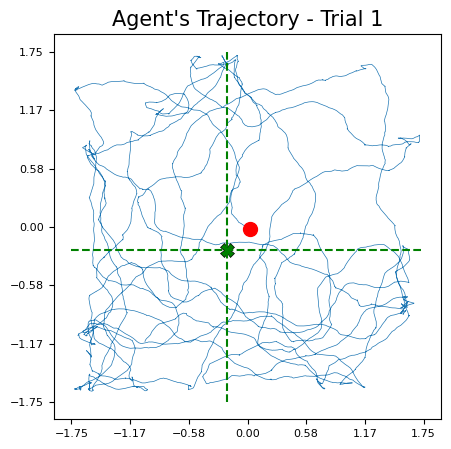

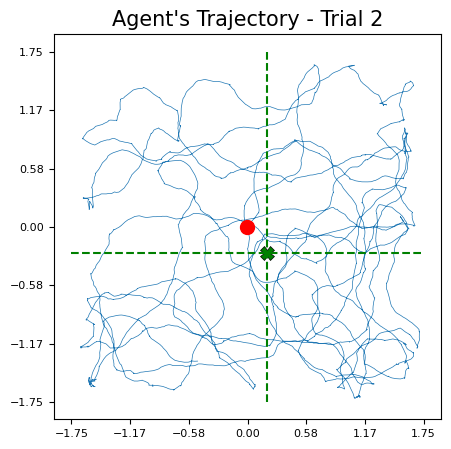

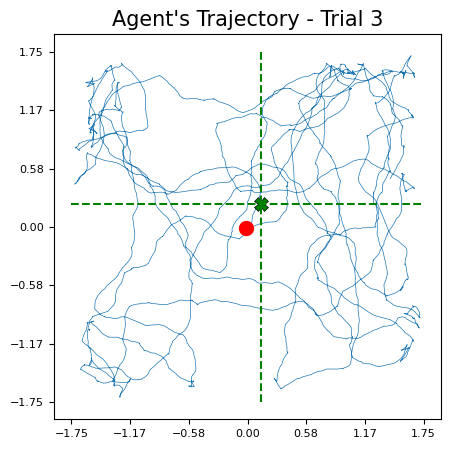

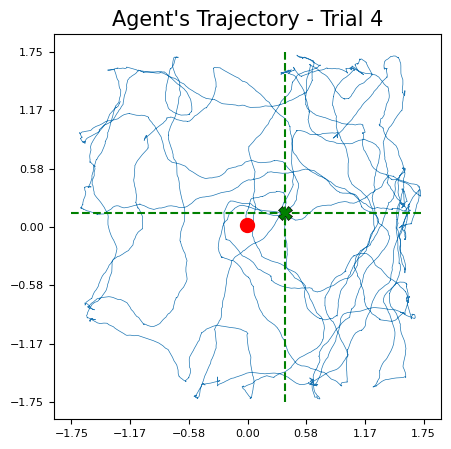

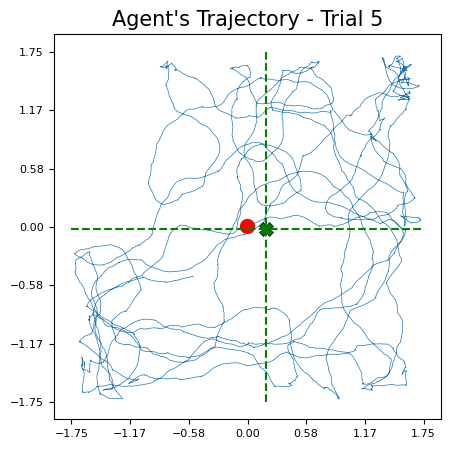

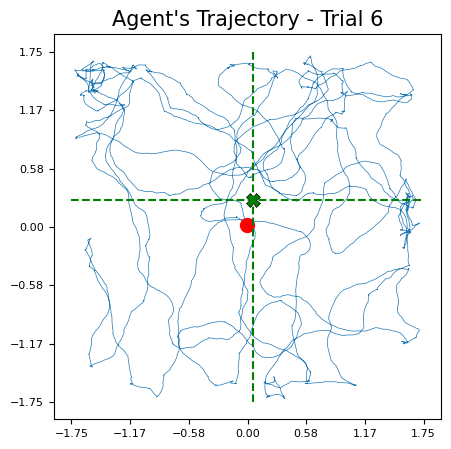

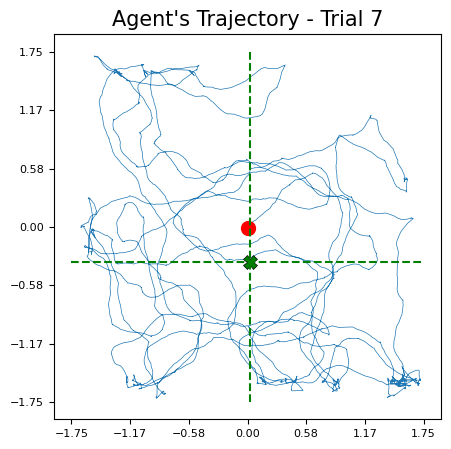

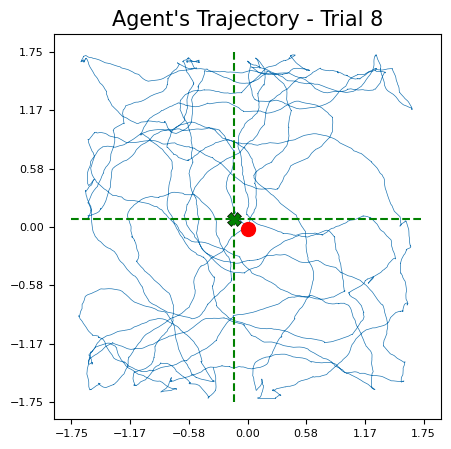

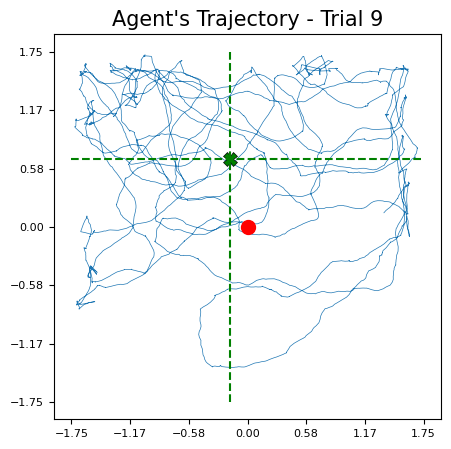

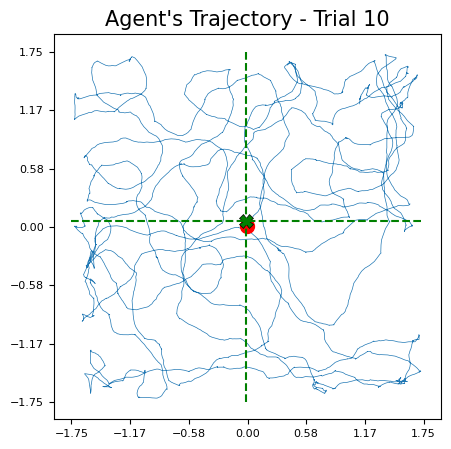

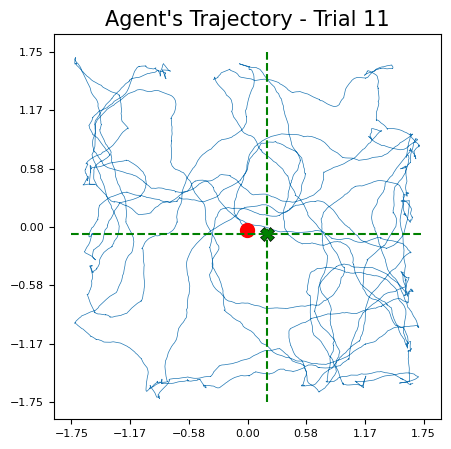

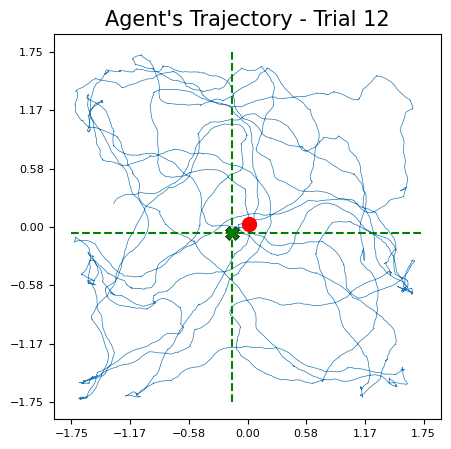

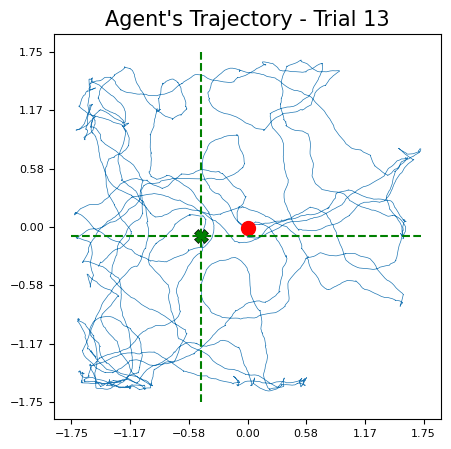

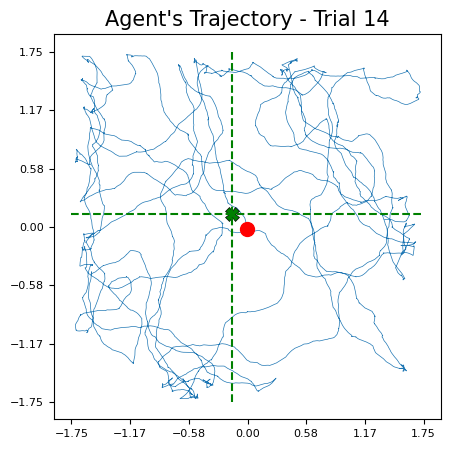

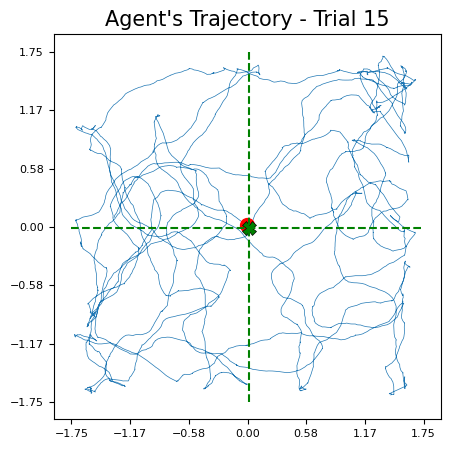

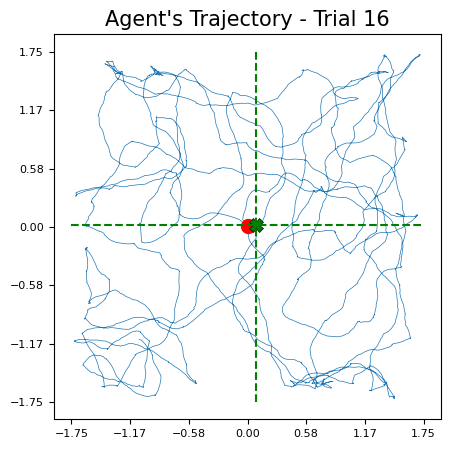

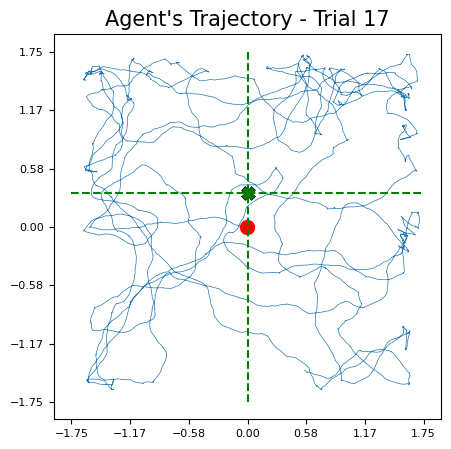

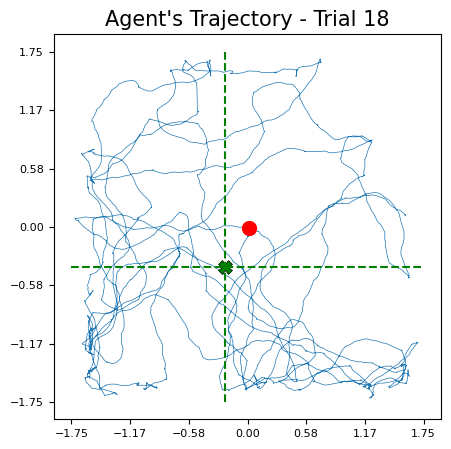

In [100]:
ticks = np.arange(-1.75, 1.8, step=0.5833)
ticks = [round(elem, 2) for elem in ticks]

for i in range(n_experiments):
    fig = plt.figure(figsize=(5, 5))
    plt.plot(Xpose[i], Ypose[i], linewidth=0.5)
    
    plt.yticks(ticks, fontsize=8)
    plt.xticks(ticks, fontsize=8)
    
    plt.title("Agent's Trajectory - Trial " + sorted_csv_files[i][:-4], fontsize=15)
    plt.plot(Xpose[i][0],Ypose[i][0],'ro', markersize=10)
    plt.plot(meanXpose[i],meanYpose[i],'Xg', markersize=10, markeredgecolor='black', markeredgewidth=0.5)
    plt.plot([meanXpose[i], meanXpose[i]], [-1.75, 1.75], color='green', linestyle='dashed', linewidth=1.5)
    plt.plot([-1.75, 1.75], [meanYpose[i], meanYpose[i]], color='green', linestyle='dashed', linewidth=1.5)
    plt.show()

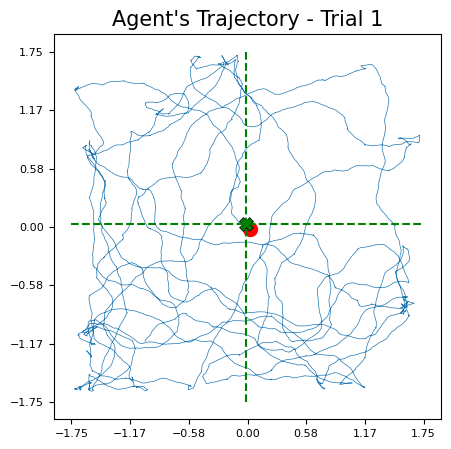

In [102]:
trial = 0
fig = plt.figure(figsize=(5, 5))
plt.plot(Xpose[trial], Ypose[trial], linewidth=0.5)

plt.yticks(ticks, fontsize=8)
plt.xticks(ticks, fontsize=8)

plt.title("Agent's Trajectory - Trial " + sorted_csv_files[trial][:-4], fontsize=15)
plt.plot(Xpose[trial][0],Ypose[trial][0],'ro', markersize=10)
plt.plot(np.mean(meanXpose), np.mean(meanYpose) ,'Xg', markersize=10, markeredgecolor='black', markeredgewidth=0.5)
plt.plot([np.mean(meanXpose), np.mean(meanXpose)], [-1.75, 1.75], color='green', linestyle='dashed', linewidth=1.5)
plt.plot([-1.75, 1.75], [np.mean(meanYpose), np.mean(meanYpose)], color='green', linestyle='dashed', linewidth=1.5)
plt.show()

[0.       0.170921 0.341842 0.512763 0.683684 0.854605 1.025526 1.196447
 1.367368 1.538289 1.70921 ]


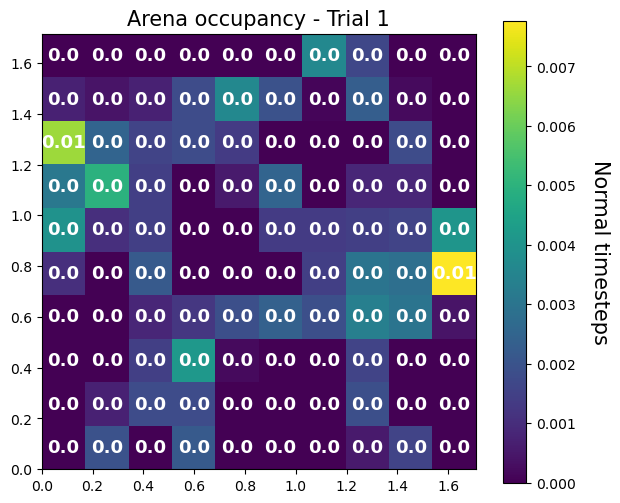

[0.       0.170879 0.341758 0.512637 0.683516 0.854395 1.025274 1.196153
 1.367032 1.537911 1.70879 ]


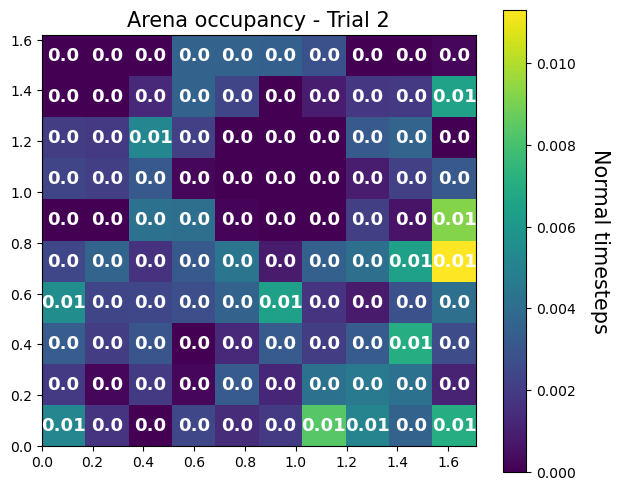

[0.       0.171433 0.342866 0.514299 0.685732 0.857165 1.028598 1.200031
 1.371464 1.542897 1.71433 ]


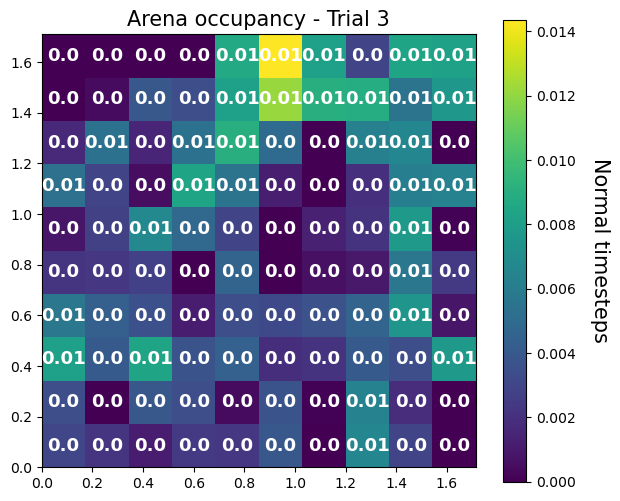

[0.       0.172035 0.34407  0.516105 0.68814  0.860175 1.03221  1.204245
 1.37628  1.548315 1.72035 ]


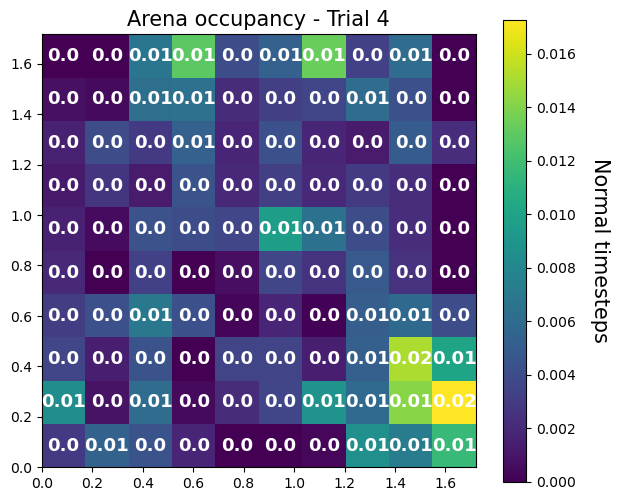

[0.      0.17199 0.34398 0.51597 0.68796 0.85995 1.03194 1.20393 1.37592
 1.54791 1.7199 ]


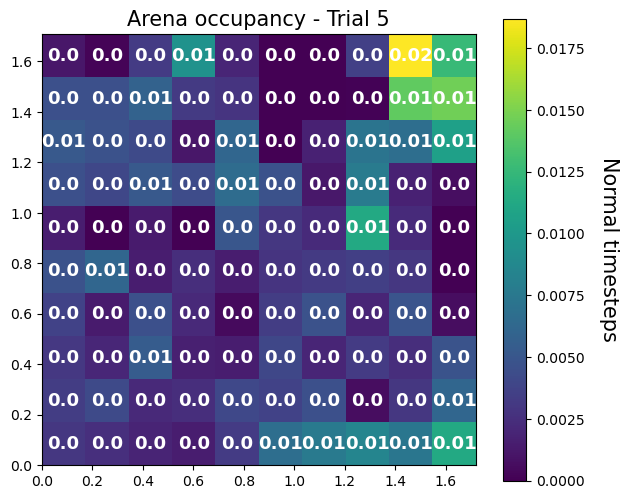

[0.       0.170855 0.34171  0.512565 0.68342  0.854275 1.02513  1.195985
 1.36684  1.537695 1.70855 ]


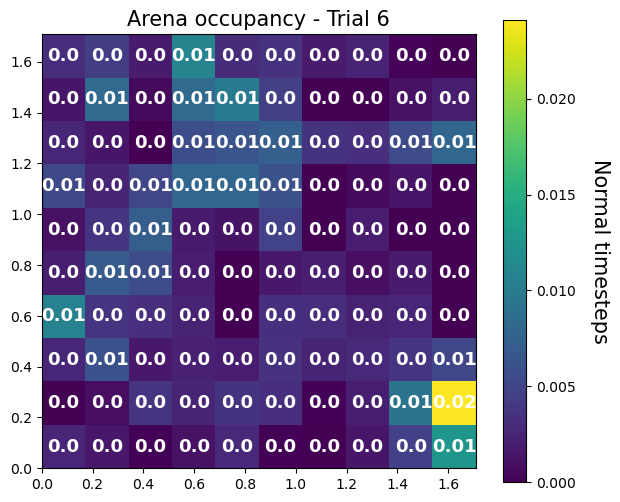

[0.       0.172051 0.344102 0.516153 0.688204 0.860255 1.032306 1.204357
 1.376408 1.548459 1.72051 ]


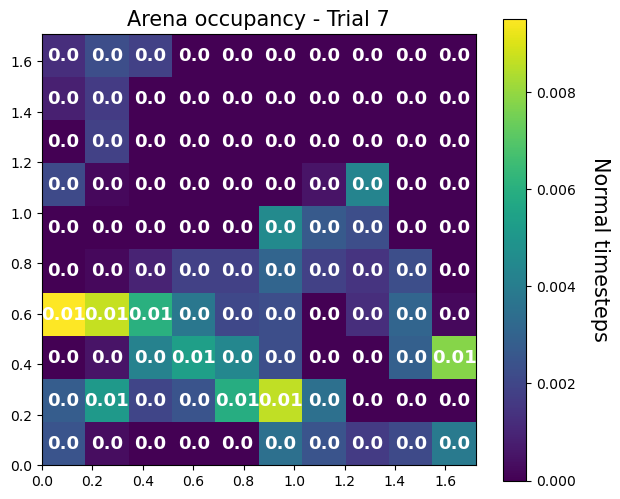

[0.       0.163589 0.327178 0.490767 0.654356 0.817945 0.981534 1.145123
 1.308712 1.472301 1.63589 ]


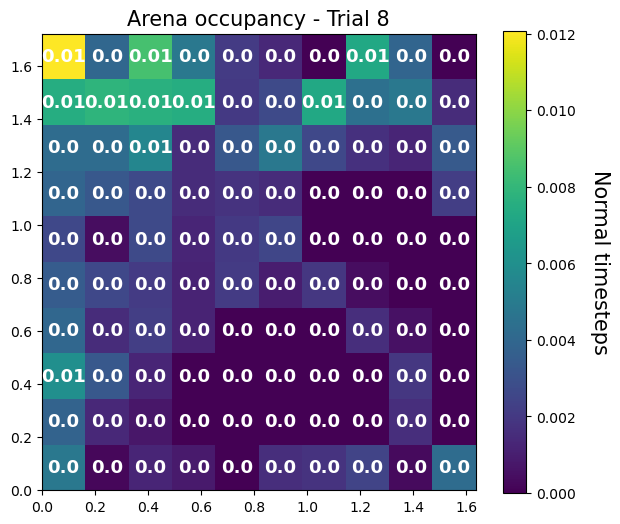

[0.       0.168958 0.337916 0.506874 0.675832 0.84479  1.013748 1.182706
 1.351664 1.520622 1.68958 ]


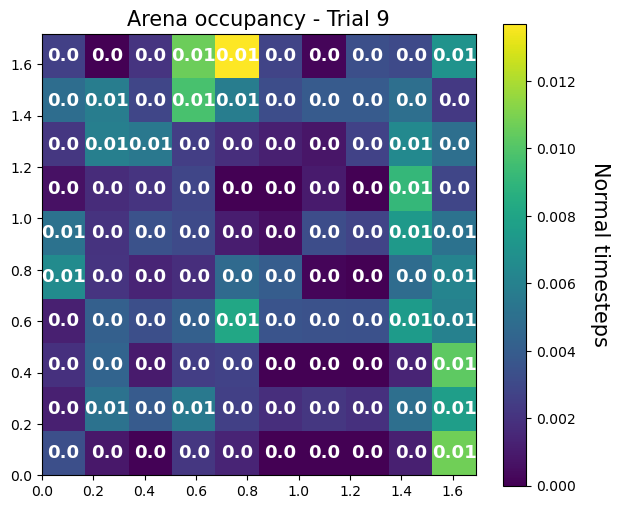

[0.       0.172115 0.34423  0.516345 0.68846  0.860575 1.03269  1.204805
 1.37692  1.549035 1.72115 ]


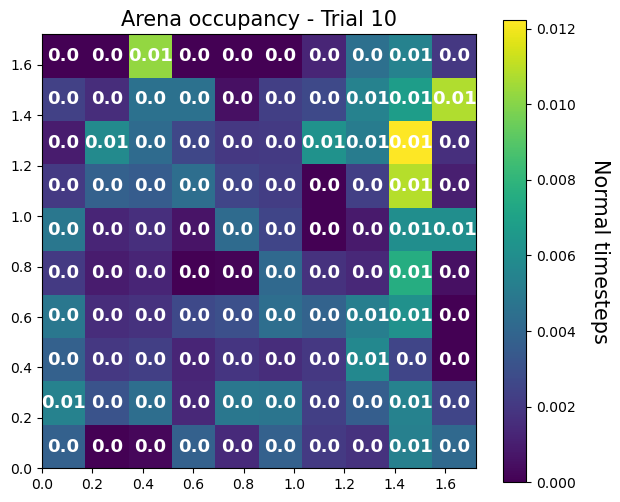

[0.       0.170518 0.341036 0.511554 0.682072 0.85259  1.023108 1.193626
 1.364144 1.534662 1.70518 ]


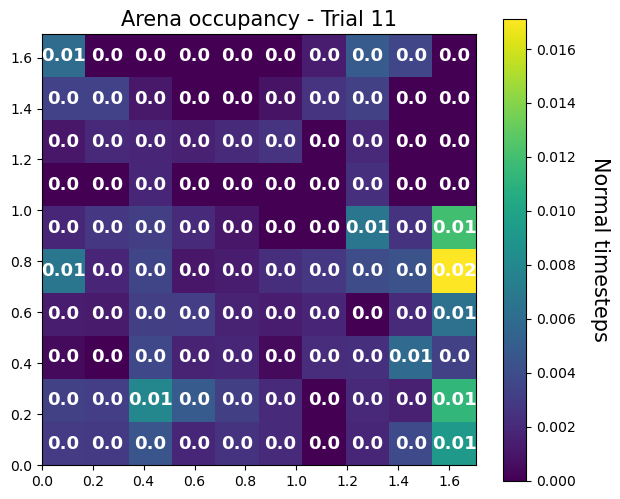

[0.       0.166005 0.33201  0.498015 0.66402  0.830025 0.99603  1.162035
 1.32804  1.494045 1.66005 ]


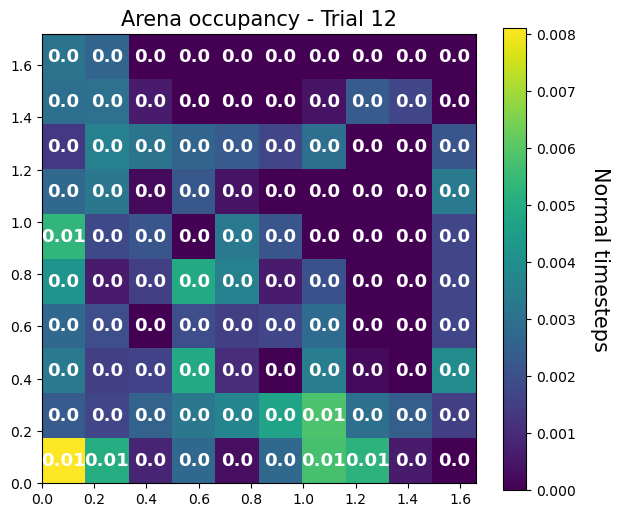

[0.       0.172088 0.344176 0.516264 0.688352 0.86044  1.032528 1.204616
 1.376704 1.548792 1.72088 ]


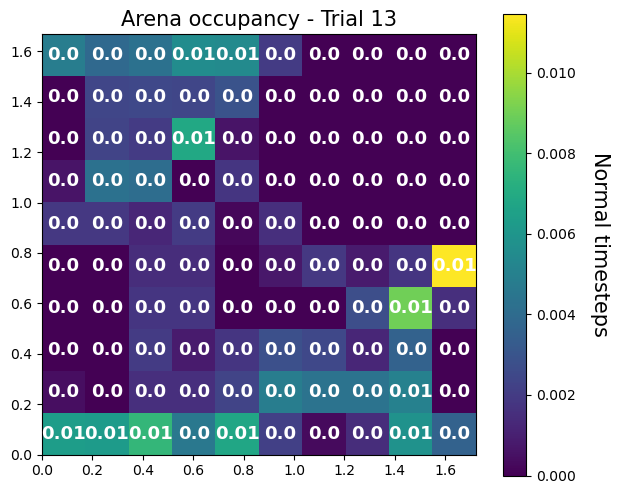

[0.      0.17169 0.34338 0.51507 0.68676 0.85845 1.03014 1.20183 1.37352
 1.54521 1.7169 ]


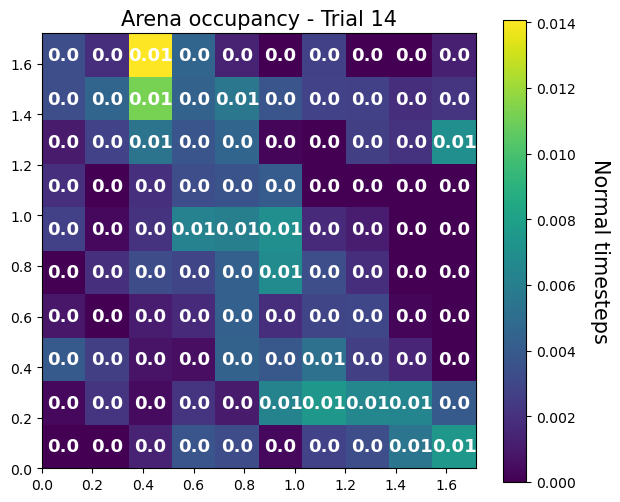

[0.       0.167071 0.334142 0.501213 0.668284 0.835355 1.002426 1.169497
 1.336568 1.503639 1.67071 ]


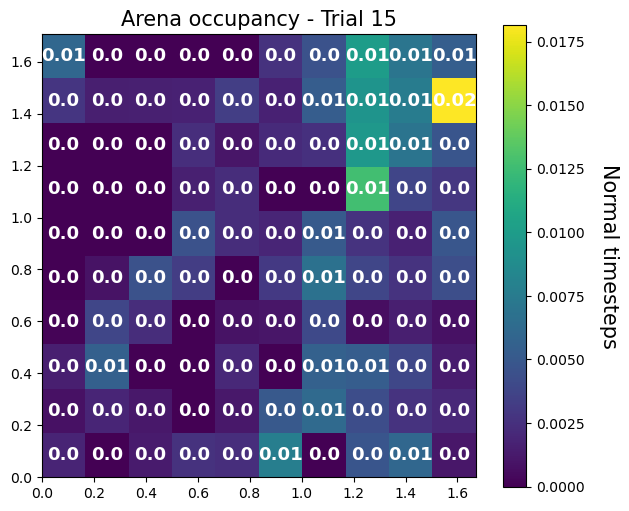

[0.       0.171623 0.343246 0.514869 0.686492 0.858115 1.029738 1.201361
 1.372984 1.544607 1.71623 ]


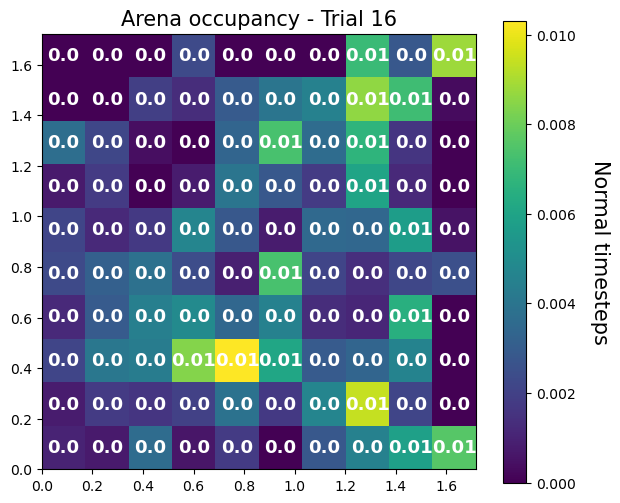

[0.       0.171056 0.342112 0.513168 0.684224 0.85528  1.026336 1.197392
 1.368448 1.539504 1.71056 ]


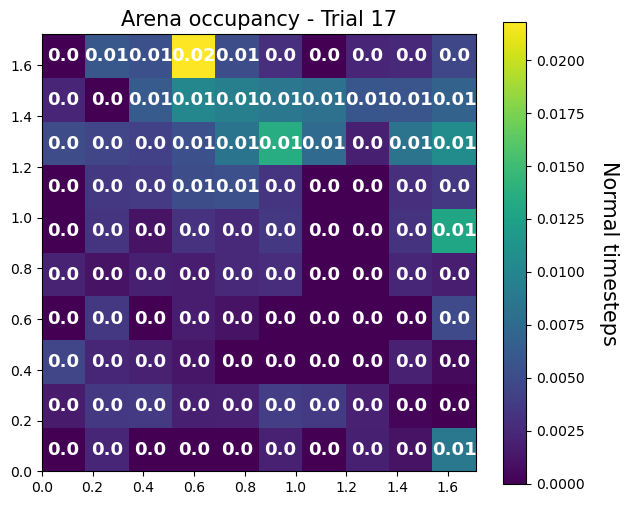

[0.       0.169223 0.338446 0.507669 0.676892 0.846115 1.015338 1.184561
 1.353784 1.523007 1.69223 ]


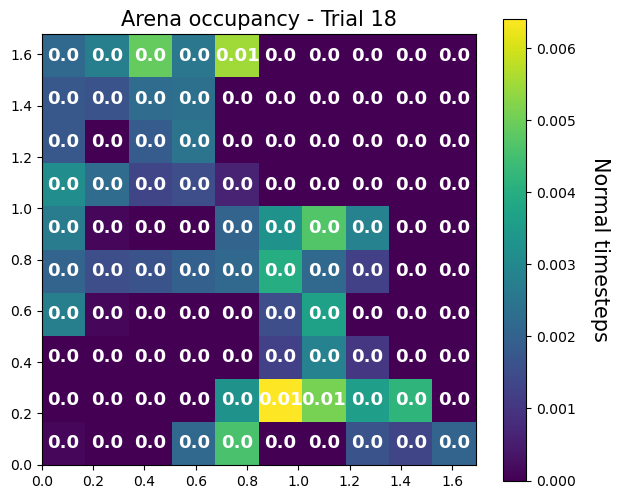

In [103]:
for a in range(n_experiments):
    xy_array = np.column_stack((Xpose[a], Ypose[a]))
    x_array = xy_array[:,0]
    y_array = xy_array[:,1]
    
    bins = 10
    xedges= []
    yedges= []
    
    for i in range(bins):
        xedges.append((max(Xpose[a])/bins)*i)
        yedges.append((max(Ypose[a])/bins)*i)
        
    xedges.append((max(Xpose[a])))
    yedges.append((max(Ypose[a])))
    
    
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.set_aspect("equal")
    hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
    H = hist.T
    H_normalized = H/float(xy_array.shape[0])
    
    print(xbins)
    
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+xedges[1]/2, ybins[i]+yedges[1]/2, round(H_normalized[i,j],2), fontsize=13, ha="center", va="center", color="w", fontweight="bold")
            
            
    ax.set_title("Arena occupancy - Trial " + sorted_csv_files[a][:-4], fontsize=15)
    #ax.set_yticks(ticks)
    #ax.set_xticks(ticks)
    hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    cbar = fig.colorbar(hist)
    cbar.set_label('Normal timesteps', rotation=270, fontsize=15, labelpad=+25)
    
    plt.show()

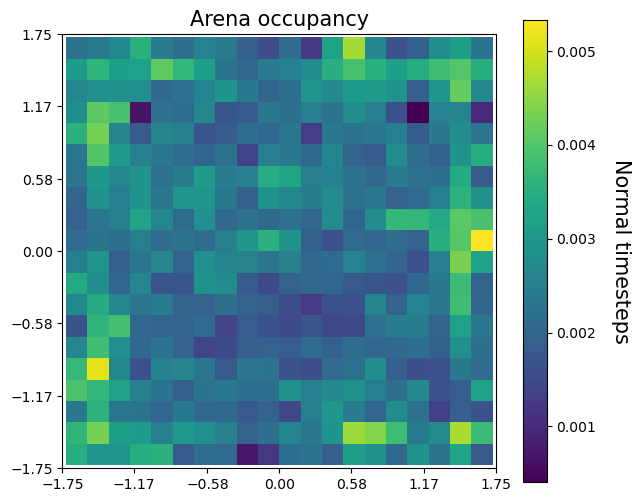

In [104]:
exp_Xpose = np.concatenate(Xpose)
exp_Ypose = np.concatenate(Ypose)

xy_array = np.column_stack((exp_Xpose, exp_Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 20
xedges = np.linspace(min(exp_Xpose), max(exp_Xpose), bins + 1)
yedges = np.linspace(min(exp_Ypose), max(exp_Ypose), bins + 1)


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
H = hist.T
H_normalized = H/float(xy_array.shape[0])


'''for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+xedges[1]/2, ybins[i]+yedges[1]/2, round(H_normalized[i,j],5), fontsize=5, ha="center", va="center", color="w")'''
        
        
ax.set_title("Arena occupancy", fontsize=15)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
cbar.set_label('Normal timesteps', rotation=270, fontsize=15, labelpad=+25)

plt.show()

### Save data into variables

In [6]:
#row_index = []
trial_number = []
trial_time = []
#frame_ID = []
#action = []
retrieved_action = []
Xpose = []
Ypose = []
#Zpose = []
internal_states = []
RewardID = []
Reward_value = []
#n_replays = []

group_length = 10

for i in range(n_experiments):
    #row_index.append(data[i]['Row_index'].to_list())
    trial_number.append(data[i]['Trial_number'].to_list())
    trial_time.append(data[i]['Trial_time'].to_list())
    #frame_ID.append(data[i]['Frame_ID'].to_list())
    #action.append(data[i]['action'].to_list())
    retrieved_action.append(data[i]['retrieved_action'].to_list())
    Xpose.append(data[i]['X'].to_list())
    Ypose.append(data[i]['Y'].to_list())
    #Zpose.append(data[i]['Z'].to_list())
    internal_states.append(data[i]['Internal_states'].to_list())
    RewardID.append(data[i]['RewardID'].to_list())
    Reward_value.append(data[i]['Reward_value'].to_list())
    #n_replays.append(data[i]['n_replays'].to_list())

data = []

n_trials = max(trial_number[0]) + 1
print('Total experiments = ' + str(n_experiments))
print('Total trials = ' + str(n_trials))

Total experiments = 13
Total trials = 1000


In [7]:
# List of string to list of floats
Reward_value = [[ast.literal_eval(item) for item in sublist] for sublist in Reward_value]
#action = [[ast.literal_eval(item) for item in sublist] for sublist in action]
internal_states = [[ast.literal_eval(item) for item in sublist] for sublist in internal_states]

In [8]:
end_trial_idx = []
for i in range(n_experiments):
    idx = [j for j in range(len(trial_number[i]) - 1) if trial_number[i][j] != trial_number[i][j + 1]]
    idx.append(len(trial_number[i]) - 1)
    end_trial_idx.append(idx)

### Formating variables by experiments

In [9]:
Xpose_by_trial = []
Ypose_by_trial = []
#Zpose_by_trial = []
retrieved_action_by_trial = []

for i in range(n_experiments):
    Xpose_experiment = []
    Ypose_experiment = []
    #Zpose_experiment = []

    retrieved_action_experiment = []
    
    prev_trial = 0
    
    for j in range(n_trials):
        next_trial = end_trial_idx[i][j]
        Xpose_experiment.append(Xpose[i][prev_trial:next_trial])
        Ypose_experiment.append(Ypose[i][prev_trial:next_trial])
        #Zpose_experiment.append(Zpose[i][prev_trial:next_trial])
        retrieved_action_experiment.append(retrieved_action[i][prev_trial:next_trial])
        prev_trial = next_trial + 1
    Xpose_by_trial.append(Xpose_experiment)
    Ypose_by_trial.append(Ypose_experiment)
    #Zpose_by_trial.append(Zpose_experiment)
    retrieved_action_by_trial.append(retrieved_action_experiment)

In [10]:
end_RewardID = []
end_Reward_value = []
end_motiv_state = []
end_motiv_state_for_rewardID = []
end_trial_time = []

for i in range(n_experiments):
    end_RewardID.append([RewardID[i][j] for j in end_trial_idx[i]])
    end_Reward_value.append([Reward_value[i][j] for j in end_trial_idx[i]])
    end_motiv_state.append([sublist.index(max(sublist)) for sublist in end_Reward_value[i]])
    end_motiv_state_for_rewardID.append([x + 2 for x in end_motiv_state[i]])
    end_trial_time.append([trial_time[i][j] for j in end_trial_idx[i]])

### Formating variables by experiments and group of trials

In [11]:
grouped_end_RewardID = []
grouped_end_trial_time = []
mean_values_trial_time = []

for i in range(n_experiments):
    grouped_end_RewardID.append([end_RewardID[i][j:j + group_length] for j in range(0, len(end_RewardID[i]), group_length)])
    grouped_end_trial_time.append([end_trial_time[i][j:j + group_length] for j in range(0, len(end_trial_time[i]), group_length)])
    mean_values_trial_time.append([sum(sublist) / len(sublist) for sublist in grouped_end_trial_time[i]])

### Cleaning unfinished trials (Work in progress)

In [12]:
grouped_fail_trials_idx = []
for i in range(n_experiments):
    fail_group_experiment = []
    for j in range(int(n_trials/group_length)):
        fail_trial_experiment = []
        for k in range(group_length):
            if grouped_end_RewardID[i][j][k] == 0:
                fail_trial_experiment.append(k)
        fail_group_experiment.append(fail_trial_experiment)
    grouped_fail_trials_idx.append(fail_group_experiment)

for i, sublist_indices in enumerate(grouped_fail_trials_idx):
    for j, indices in enumerate(sublist_indices):
        # Sort indices in descending order to avoid index shifting
        for index in sorted(indices, reverse=True):
            del end_trial_time[i][j][index]

# Results
### Overall reward gathering

In [13]:
group_correct_blue = []
group_correct_red = []
group_correct_purple = []
group_correct_orange = []
group_incorrect_blue = []
group_incorrect_red = []
group_incorrect_purple = []
group_incorrect_orange = []
group_unfinished_trials = []

for i in range(n_experiments):
    correct_blue = 0
    correct_red = 0
    correct_purple = 0
    correct_orange = 0
    incorrect_blue = 0
    incorrect_red = 0
    incorrect_purple = 0
    incorrect_orange = 0
    unfinished_trials = 0
    for x, y in zip(end_RewardID[i], end_motiv_state_for_rewardID[i]):
        if x == 2 and y == 2:
            correct_blue += 1
        elif x == 3 and y == 3:
            correct_red += 1
        elif x == 4 and y == 4:
            correct_purple += 1
        elif x == 5 and y == 5:
            correct_orange += 1
        elif x == 2 and y != 2:
            incorrect_blue += 1
        elif x == 3 and y != 3:
            incorrect_red += 1
        elif x == 4 and y != 4:
            incorrect_purple += 1
        elif x == 5 and y != 5:
            incorrect_orange += 1
        elif x == 0:
            unfinished_trials += 1

    group_correct_blue.append(correct_blue)
    group_correct_red.append(correct_red)
    group_correct_purple.append(correct_purple)
    group_correct_orange.append(correct_orange)
    group_incorrect_blue.append(incorrect_blue)
    group_incorrect_red.append(incorrect_red)
    group_incorrect_purple.append(incorrect_purple)
    group_incorrect_orange.append(incorrect_orange)
    group_unfinished_trials.append(unfinished_trials)

In [14]:
means = [statistics.mean(group_correct_blue), statistics.mean(group_correct_red), statistics.mean(group_correct_purple), statistics.mean(group_correct_orange),
         statistics.mean(group_incorrect_blue), statistics.mean(group_incorrect_red), statistics.mean(group_incorrect_purple), statistics.mean(group_incorrect_orange),statistics.mean(group_unfinished_trials)]
stdevs = [statistics.stdev(group_correct_blue), statistics.stdev(group_correct_red), statistics.stdev(group_correct_purple), statistics.stdev(group_correct_orange),
          statistics.stdev(group_incorrect_blue), statistics.stdev(group_incorrect_red), statistics.stdev(group_incorrect_purple), statistics.stdev(group_incorrect_orange), statistics.stdev(group_unfinished_trials)]

print("Mean Correct Blue reward:", means[0])
print("Mean Correct Red reward:", means[1])
print("Mean Correct Purple reward:", means[2])
print("Mean Correct Orange reward:", means[3])
print("Mean Incorrect Blue reward:", means[4])
print("Mean Incorrect Red reward:", means[5])
print("Mean Incorrect Purple reward:", means[6])
print("Mean Incorrect Orange reward:", means[7])
print()
print("Mean Total correct trials:", means[0] + means[1]+ means[2]+ means[3])
print("Mean Total incorrect trials:", means[4] + means[5] + means[6] + means[7])
print("Mean Unfinished trials:", means[8])

Mean Correct Blue reward: 160.69230769230768
Mean Correct Red reward: 176.23076923076923
Mean Correct Purple reward: 131.6153846153846
Mean Correct Orange reward: 154.15384615384616
Mean Incorrect Blue reward: 65.84615384615384
Mean Incorrect Red reward: 84.15384615384616
Mean Incorrect Purple reward: 61.23076923076923
Mean Incorrect Orange reward: 69.23076923076923

Mean Total correct trials: 622.6923076923077
Mean Total incorrect trials: 280.46153846153845
Mean Unfinished trials: 96.84615384615384


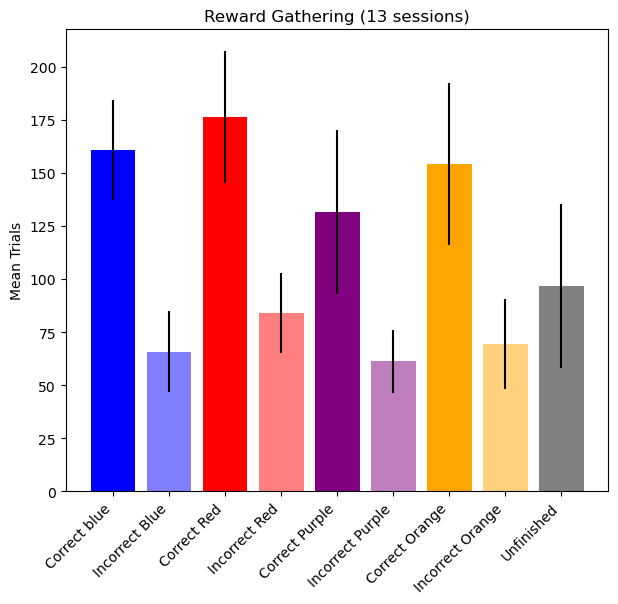

In [15]:
labels = [0,1,2,3,4,5,6,7,8]
xticks = ['Correct blue', 'Incorrect Blue', 'Correct Red', 'Incorrect Red', 'Correct Purple', 'Incorrect Purple', 'Correct Orange', 'Incorrect Orange', 'Unfinished']
color_bar=['blue', 'blue', 'red', 'red', 'purple', 'purple', 'orange', 'orange', 'grey']
values = [means[0], means[4], means[1], means[5], means[2], means[6], means[3], means[7], means[8]]
plot_stdevs = [stdevs[0], stdevs[4], stdevs[1], stdevs[5], stdevs[2], stdevs[6], stdevs[3], stdevs[7], stdevs[8]]

alphas = [1, 0.5, 1, 0.5, 1, 0.5, 1, 0.5, 1]  # Define different alpha values for each bar

# Plot
plt.figure(figsize=(7, 6))
for i, (label, value, yerr, color, alpha) in enumerate(zip(labels, values, plot_stdevs, color_bar, alphas)):
    plt.bar(label, value, yerr=yerr, color=color, alpha=alpha)
plt.ylabel('Mean Trials')
plt.title('Reward Gathering (' + str(n_experiments) + ' sessions)')

plt.xticks(labels, xticks, rotation=45, ha='right')
plt.show()

## Performance measures
### Probability of correct trials

In [16]:
correct_trials = []
for i in range(len(end_motiv_state_for_rewardID)):
    correct_trial = []
    for j in range(len(end_motiv_state_for_rewardID[i])):
        if end_motiv_state_for_rewardID[i][j] == end_RewardID[i][j]:
            correct_trial.append(1)
        else:
            correct_trial.append(0)
    correct_trials.append(correct_trial)

grouped_correct_trials = [[sublist[i:i+group_length] for i in range(0, len(correct_trials[0]), group_length)] for sublist in correct_trials]
mean_grouped_correct_trials = []
for i in range(len(grouped_correct_trials)):
    mean_grouped_correct_trials.append([sum(sublist) / len(sublist) for sublist in grouped_correct_trials[i]])

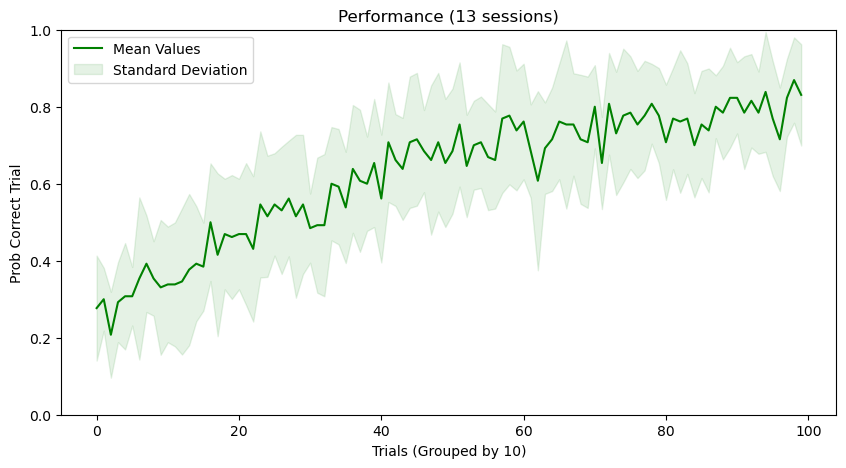

In [17]:
summed_mean_correct_trials = [statistics.mean(elements) for elements in zip(*mean_grouped_correct_trials)]
stdev_mean_correct_trials = [statistics.stdev(elements) for elements in zip(*mean_grouped_correct_trials)]

# X-axis positions
x = range(len(summed_mean_correct_trials))

# Create line plot
plt.figure(figsize=(10, 5))
plt.plot(x, summed_mean_correct_trials, label='Mean Values', color='green')
plt.fill_between(x, 
                 [m - s for m, s in zip(summed_mean_correct_trials, stdev_mean_correct_trials)], 
                 [m + s for m, s in zip(summed_mean_correct_trials, stdev_mean_correct_trials)], 
                 color='green', alpha=0.1, label='Standard Deviation')

# Labels and title
plt.xlabel('Trials (Grouped by ' + str(group_length) + ')')
plt.ylabel('Prob Correct Trial')
plt.title('Performance (' + str(n_experiments) + ' sessions)')
plt.ylim(0, 1)
plt.legend(loc=2)
plt.show()

### Probability of fail trials

### Time analysis

In [18]:
summed_mean_time = [statistics.mean(elements) for elements in zip(*mean_values_trial_time)]
stdev_mean_time = [statistics.stdev(elements) for elements in zip(*mean_values_trial_time)]

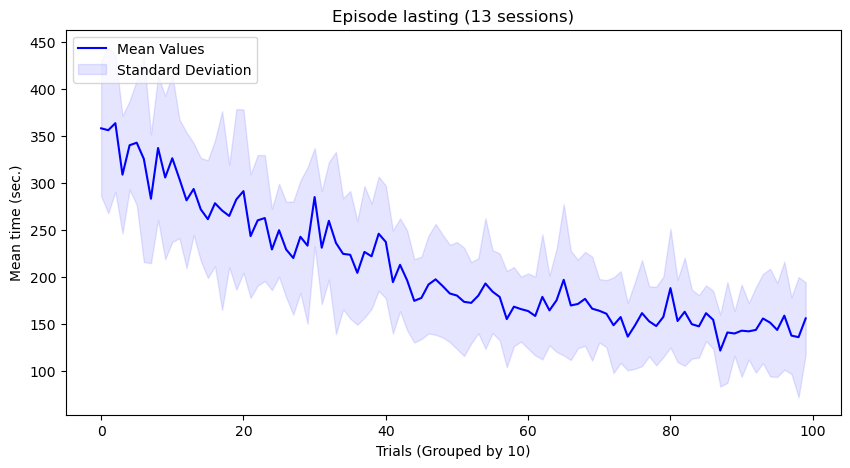

In [19]:
# X-axis positions
x = range(len(summed_mean_time))

# Create line plot
plt.figure(figsize=(10, 5))
plt.plot(x, summed_mean_time, label='Mean Values', color='blue')
plt.fill_between(x, 
                 [m - s for m, s in zip(summed_mean_time, stdev_mean_time)], 
                 [m + s for m, s in zip(summed_mean_time, stdev_mean_time)], 
                 color='blue', alpha=0.1, label='Standard Deviation')

# Labels and title
plt.xlabel('Trials (Grouped by ' + str(group_length) + ')')
plt.ylabel('Mean time (sec.)')
plt.title('Episode lasting (' + str(n_experiments) + ' sessions)')
plt.legend(loc=2)
plt.show()

### Distance anaylisis

In [20]:
distances_travelled = []

for Experiment in range(n_experiments):
    experiment_distance = []
    for Trial in range(n_trials):
        total_distance = 0
        for i in range(1, len(Xpose_by_trial[Experiment][Trial])):
            # Calculate the Euclidean distance between consecutive points
            distance = math.sqrt((Xpose_by_trial[Experiment][Trial][i] - Xpose_by_trial[Experiment][Trial][i - 1])**2 + ( Ypose_by_trial[Experiment][Trial][i] -  Ypose_by_trial[Experiment][Trial][i - 1])**2)
            # Add the distance to the total
            total_distance += distance
        experiment_distance.append(total_distance)

    distances_travelled.append(experiment_distance)

In [21]:
grouped_distances_travelled = []
mean_distances_travelled = []

for i in range(n_experiments):
    grouped_distances_travelled.append([distances_travelled[i][j:j + group_length] for j in range(0, len(distances_travelled[i]), group_length)])
    mean_distances_travelled.append([sum(sublist) / len(sublist) for sublist in grouped_distances_travelled[i]])

summed_mean_distance = [statistics.mean(elements) for elements in zip(*mean_distances_travelled)]
stdev_mean_distance = [statistics.stdev(elements) for elements in zip(*mean_distances_travelled)]

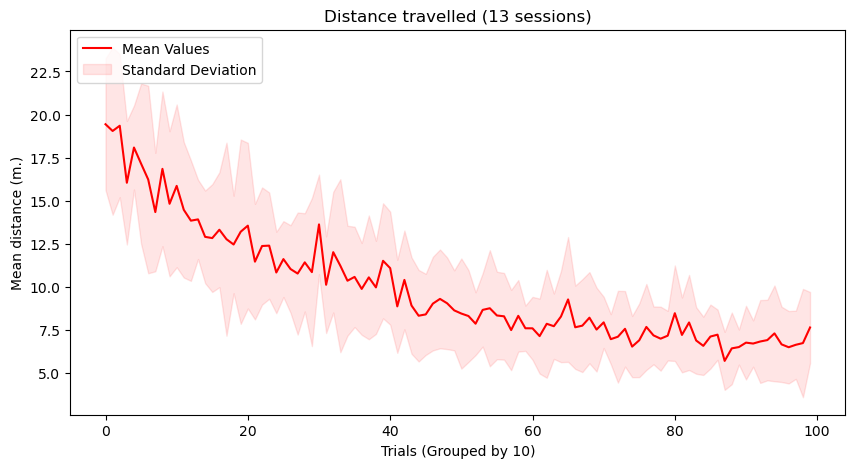

In [22]:
# X-axis positions
x = range(len(summed_mean_distance))

# Create line plot
plt.figure(figsize=(10, 5))
plt.plot(x, summed_mean_distance, label='Mean Values', color='red')
plt.fill_between(x, 
                 [m - s for m, s in zip(summed_mean_distance, stdev_mean_distance)], 
                 [m + s for m, s in zip(summed_mean_distance, stdev_mean_distance)], 
                 color='red', alpha=0.1, label='Standard Deviation')

# Labels and title
plt.xlabel('Trials (Grouped by ' + str(group_length) + ')')
plt.ylabel('Mean distance (m.)')
plt.title('Distance travelled (' + str(n_experiments) + ' sessions)')
plt.legend(loc=2)
plt.show()

### Ratio of retrieved action

In [23]:
ratio_retrieved_action = []

for exp in range(n_experiments):
    trial_ratio = []
    for trial in range(n_trials):
        try:
            trial_ratio.append(sum(retrieved_action_by_trial[exp][trial]) / len(retrieved_action_by_trial[exp][trial]))
        except ZeroDivisionError:
            trial_ratio.append(0)
    ratio_retrieved_action.append(trial_ratio)

trial_ratio = []

In [24]:
grouped_ratio_retrieved_action = []
mean_ratio_retrieved_action = []

for i in range(n_experiments):
    grouped_ratio_retrieved_action.append([ratio_retrieved_action[i][j:j + group_length] for j in range(0, len(ratio_retrieved_action[i]), group_length)])
    mean_ratio_retrieved_action.append([sum(sublist) / len(sublist) for sublist in grouped_ratio_retrieved_action[i]])

ratio_retrieved_action = []
grouped_ratio_retrieved_action = []

In [25]:
summed_mean_retrieved_action = [statistics.mean(elements) for elements in zip(*mean_ratio_retrieved_action)]
stdev_mean_retrieved_action = [statistics.stdev(elements) for elements in zip(*mean_ratio_retrieved_action)]

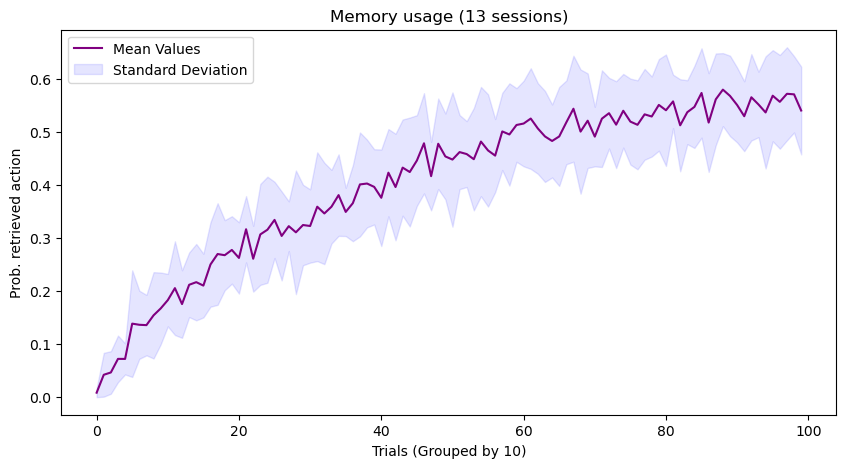

In [26]:
# X-axis positions
x = range(len(summed_mean_retrieved_action))

# Create line plot
plt.figure(figsize=(10, 5))
plt.plot(x, summed_mean_retrieved_action, label='Mean Values', color='purple')
plt.fill_between(x, 
                 [m - s for m, s in zip(summed_mean_retrieved_action, stdev_mean_retrieved_action)], 
                 [m + s for m, s in zip(summed_mean_retrieved_action, stdev_mean_retrieved_action)], 
                 color='blue', alpha=0.1, label='Standard Deviation')

# Labels and title
plt.xlabel('Trials (Grouped by ' + str(group_length) + ')')
plt.ylabel('Prob. retrieved action')
plt.title('Memory usage (' + str(n_experiments) + ' sessions)')
plt.legend(loc=2)
plt.show()

### Explore trajectories

In [27]:
def agent_trajectory(Xpose, Ypose):
    obstacle1x =[-1.22, -1.22, -.45, -.45, -1.1, -1.1, -.45, -.45, -1.22, -1.22, -.07, -.07, .07, .07, 1.22, 1.22, .45,
                .45, 1.1, 1.1, .45, .45, 1.22, 1.22, .07, .07, -.07, -.07, -1.22]
    obstacle1y =[-1.2, -.8, -.8, -.7, -.7, .7, .7, .8, .8, 1.2, 1.2, .75, .75, 1.2, 1.2, .8, .8, .7, .7, -.7, -.7, 
                -.8, -.8, -1.2, -1.2, -.75, -.75, -1.2, -1.2]
    obstacle2x = [-.4, -.4, .4, .4, -.4]
    obstacle2y = [-.35, -.2, -.2, -.35, -.35]
    obstacle3x = [-.4, -.4, .4, .4, -.4]
    obstacle3y = [.35, .2, .2, .35, .35]
    obstaclesx = [obstacle1x, obstacle2x,obstacle3x]
    obstaclesy = [obstacle1y, obstacle2y,obstacle3y]

    figsize=(5,5)        
    fig = plt.figure(figsize=figsize)
    for i in range(len(obstaclesx)):
        plt.plot(obstaclesx[i], obstaclesy[i], linewidth=3, color='grey')

    plt.plot(Xpose, Ypose, linewidth=1.5)
    plt.yticks(np.arange(-2, 2, step=.5), fontsize=10)
    plt.xticks(np.arange(-2, 2, step=.5), fontsize=10)
    plt.title("Agent's trajectory", fontsize=30)
    plt.plot(Xpose[0],Ypose[0],'go', markersize=10)

    plt.plot(-1.15, 1.0, 'o', color='red', markersize=10, alpha=0.3)
    plt.plot(1.15, 1.0, 'o', color='blue', markersize=10, alpha=0.3)
    plt.plot(-1.15, -1.0, 'o', color='purple', markersize=10, alpha=0.3)
    plt.plot(1.15, -1.0, 'o', color='orange', markersize=10, alpha=0.3)
    plt.show()

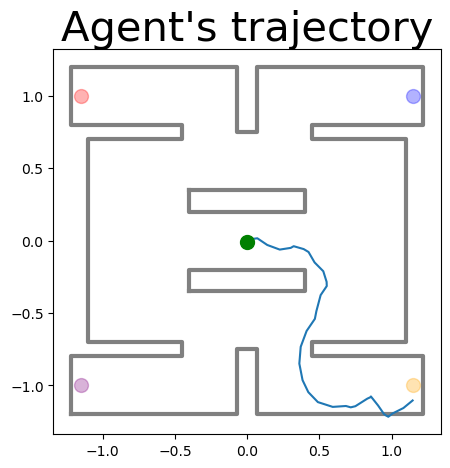

In [28]:
experiment = 0
trial = 996

x = Xpose_by_trial[experiment][trial]
y = Ypose_by_trial[experiment][trial]

agent_trajectory(x, y)